# Coffee Price Prediction with Regression

###Abstract
  In the following project, a dataset with coffee prices from 01/03/2000 until 22/06/2021 is picked. Purpose of this project is to predict the closing price of the stock market, given high, low and open prices and volume of that date. Linear Regression and Random Forest Regression models are implemented for this task.

## Imports and uploads

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from google.colab import files,drive
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, KFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error, mean_absolute_error
import plotly.graph_objects as go

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"stamatiskal","key":"2b4b059b607428bc27c45b2af9eeee2b"}'}

In [ ]:
# Make directory named kaggle and copy kaggle.json file there.
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d psycon/daily-coffee-price

  0% 0.00/71.8k [00:00<?, ?B/s]
100% 71.8k/71.8k [00:00<00:00, 71.1MB/s]


In [ ]:
! mkdir coffeeprice
! unzip daily-coffee-price.zip  -d coffeeprice
! rm daily-coffee-price.zip

Archive:  daily-coffee-price.zip
  inflating: coffeeprice/coffee.csv  


## Read Data

In [ ]:
regdata = pd.read_csv('/content/coffeeprice/coffee.csv')

In [ ]:
data1 = regdata

## Exploratory Data Analysis

In [ ]:
data1.shape

(5697, 7)

In [ ]:
len(data1)

5697

In [ ]:
data1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')

In [ ]:
data1.isnull().sum()

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5697 entries, 0 to 5696
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5697 non-null   object 
 1   Open      5697 non-null   float64
 2   High      5697 non-null   float64
 3   Low       5697 non-null   float64
 4   Close     5697 non-null   float64
 5   Volume    5697 non-null   int64  
 6   Currency  5697 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 311.7+ KB


In [ ]:
data1

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-03,122.25,124.00,116.10,116.50,6640,USD
1,2000-01-04,116.25,120.50,115.75,116.25,5492,USD
2,2000-01-05,115.00,121.00,115.00,118.60,6165,USD
3,2000-01-06,119.00,121.40,116.50,116.85,5094,USD
4,2000-01-07,117.25,117.75,113.80,114.15,6855,USD
...,...,...,...,...,...,...,...
5690,2022-06-15,225.85,229.70,221.75,228.50,9194,USD
5691,2022-06-16,228.50,233.00,226.20,231.95,5592,USD
5692,2022-06-17,232.70,234.50,226.80,227.65,9111,USD
5693,2022-06-21,227.60,235.25,227.40,232.35,30335,USD


In [ ]:
data1.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-03,122.25,124.00,116.10,116.50,6640,USD
1,2000-01-04,116.25,120.50,115.75,116.25,5492,USD
2,2000-01-05,115.00,121.00,115.00,118.60,6165,USD
3,2000-01-06,119.00,121.40,116.50,116.85,5094,USD
4,2000-01-07,117.25,117.75,113.80,114.15,6855,USD


Below, an OHLC chart is shown, which shows us the increasing or decreasing momentum.

In [ ]:
fig = go.Figure(data=go.Ohlc(x=data1['Date'],
                    open=data1['Open'],
                    high=data1['High'],
                    low=data1['Low'],
                    close=data1['Close']))
fig.show()

Text(0.5, 1.0, 'Open-Close prices over the years')

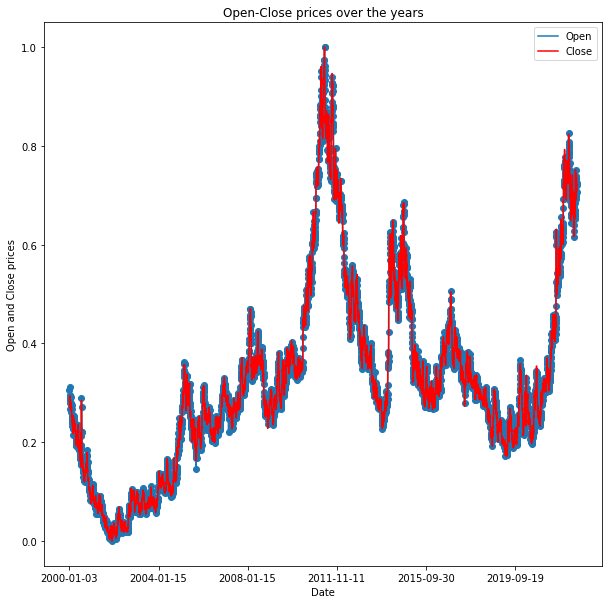

In [ ]:
axis = plt.gca()
data1.plot(x="Date", y="Open" , marker = 'o', ax = axis,figsize=(10,10))
data1.plot(x="Date", y="Close",color = 'r', ax=axis,figsize=(10,10))
plt.ylabel('Open and Close prices')
plt.title('Open-Close prices over the years')

Text(0.5, 1.0, 'High-Low prices over the years')

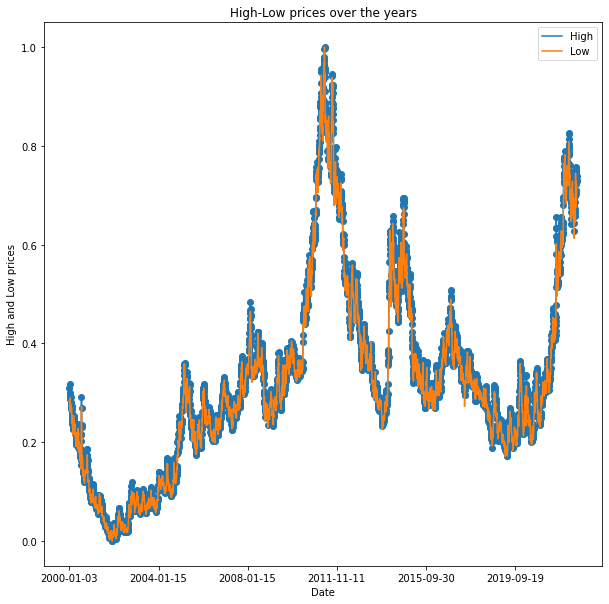

In [ ]:
axis = plt.gca()
data1.plot(x="Date", y="High",marker='o', ax = axis,figsize=(10,10))
data1.plot(x="Date", y="Low", ax = axis,figsize=(10,10))
plt.ylabel('High and Low prices')
plt.title('High-Low prices over the years')

When the open and close are far apart it shows strong momentum, and when the open and close are close together it shows indecision or weak momentum. The high and low show the full price range of the period, useful in assessing volatility.
The graphs shown above show that the open and close prices are close together(meaning weak momentum) and the high and low prices are a little further away than the open-close prices, which means medium volatility(not high risk).

## Data Preprocessing

In [ ]:
z = data1[["Currency"]]
def unique(z):
    x = np.array(z)
    print(np.unique(x))
unique(z)

['USD']


In [ ]:
data1.isnull().sum()

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

We do not need the Currency feature.

In [ ]:
data1 = data1.drop(['Currency'], axis = 1)

In [ ]:
data1.head()

,Date,Open,High,Low,Close,Volume
0,2000-01-03,122.25,124.00,116.10,116.50,6640
1,2000-01-04,116.25,120.50,115.75,116.25,5492
2,2000-01-05,115.00,121.00,115.00,118.60,6165
3,2000-01-06,119.00,121.40,116.50,116.85,5094
4,2000-01-07,117.25,117.75,113.80,114.15,6855


Normalizing dataset.

In [ ]:
norm_scaler = MinMaxScaler()
data1[['Open']]= norm_scaler.fit_transform(data1[['Open']])
data1[['High']] = norm_scaler.fit_transform(data1[['High']])
data1[['Low']] = norm_scaler.fit_transform(data1[['Low']])
data1[['Close']] = norm_scaler.fit_transform(data1[['Close']])
data1[['Volume']] = norm_scaler.fit_transform(data1[['Volume']])

In [ ]:
data1.head()

,Date,Open,High,Low,Close,Volume
0,2000-01-03,0.306103,0.310312,0.284190,0.284738,0.107019
1,2000-01-04,0.283359,0.297067,0.282857,0.283789,0.088516
2,2000-01-05,0.278620,0.298959,0.280000,0.292711,0.099363
3,2000-01-06,0.293783,0.300473,0.285714,0.286067,0.082102
4,2000-01-07,0.287149,0.286660,0.275429,0.275816,0.110484


In [ ]:
x = data1 [[  'Open', 'High','Low', 'Volume']]
y = data1 [['Close']]

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
print('Loaded: train size:', len(x_train), ', test size:',len(x_test))

Loaded: train size: 4557 , test size: 1140


In [ ]:
x_train, x_val, Y_train, Y_val = train_test_split(x_train, Y_train, test_size = 0.1, random_state = 1)
print('Loaded: train size:', len(x_train), ', test size:',len(x_val))

Loaded: train size: 4101 , test size: 456


## Linear Regression

In [ ]:
linregressor = LinearRegression()

In [ ]:
linregressor.fit(x_train, Y_train)

LinearRegression()

In [ ]:
linregressor.score(x_train, Y_train)

0.9994380562960876

In [ ]:
linregressor.score(x_test, Y_test)

0.9995465001719495

In [ ]:
linregressor.score(x_val, Y_val)

0.9994604581877291

In [ ]:
y_pred = linregressor.predict(x_val)

In [ ]:
d = r2_score(Y_val, y_pred)
print(d)

0.9994604581877291


Text(0.5, 1.0, 'Validation Accuracy of Linear Regression model')

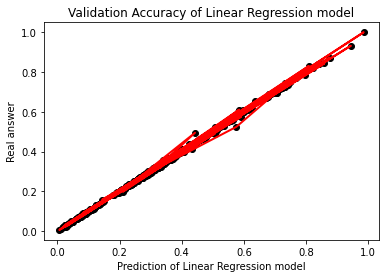

In [ ]:
plt.scatter(y_pred, Y_val, color="black")
plt.plot(y_pred, Y_val ,color="red", linewidth=2)
plt.xlabel('Prediction of Linear Regression model')
plt.ylabel('Real answer')
plt.title('Validation Accuracy of Linear Regression model')

## Random Forest

In [ ]:
randfor = RandomForestRegressor( n_estimators=400, criterion='squared_error', bootstrap=True, n_jobs= -1,  random_state=1, verbose=0, max_depth=15 )

In [ ]:
randfor.fit(x_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(max_depth=15, n_estimators=400, n_jobs=-1, random_state=1)

In [ ]:
print('Accuracy score for training set is: ',randfor.score(x_train, Y_train))
print('Accuracy score for test set is: ',randfor.score(x_test, Y_test))
print('Accuracy score for validation set is: ',randfor.score(x_val, Y_val))

Accuracy score for training set is:  0.9998784942185928
Accuracy score for test set is:  0.9993238649835193
Accuracy score for validation set is:  0.9990027087309947


In [ ]:
y_pred = randfor.predict(x_val)

Text(0.5, 1.0, 'Validation Accuracy of Random Forest model')

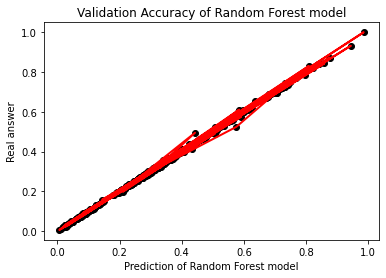

In [ ]:
plt.scatter(y_pred, Y_val, color="black")
plt.plot(y_pred, Y_val ,color="red", linewidth=2)
plt.xlabel('Prediction of Random Forest model')
plt.ylabel('Real answer')
plt.title('Validation Accuracy of Random Forest model')